In [2]:
# imports 
import os
import pandas as pd
import numpy as np

# load data
train = pd.read_csv('../data/processed/train_data_processed.csv')
test = pd.read_csv('../data/processed/test_data_processed.csv')
val = pd.read_csv('../data/processed/val_data_processed.csv')


In [3]:
# more feature engineering
# use encoder to encode OCCURRED_ON_DATE column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['OCCURRED_ON_DATE'] = le.fit_transform(train['OCCURRED_ON_DATE'])
test['OCCURRED_ON_DATE'] = le.transform(test['OCCURRED_ON_DATE'])
val['OCCURRED_ON_DATE'] = le.transform(val['OCCURRED_ON_DATE'])


In [5]:
# save le 
import joblib
joblib.dump(le, '../models/datetime_encoder.pkl')

['../models/datetime_encoder.pkl']

In [6]:
#drop _id column

test = test.drop('_id', axis=1)
val = val.drop('_id', axis=1)

In [8]:
# define the target variable
y_train = train['Severe_crimes']
y_test = test['Severe_crimes']
y_val = val['Severe_crimes']

# define the features
X_train = train.drop(['Severe_crimes'], axis=1)
X_test = test.drop(['Severe_crimes'], axis=1)
X_val = val.drop(['Severe_crimes'], axis=1)

In [10]:
# use GradientBoostingClassifier to train the model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# test using different learning rates
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=101, learning_rate = learning_rate, max_features=2, max_depth = 4, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_val, y_val)))
    print()

# use the best learning rate to train the model


Learning rate:  0.05
Accuracy score (training): 0.994
Accuracy score (validation): 0.994

Learning rate:  0.1
Accuracy score (training): 0.995
Accuracy score (validation): 0.994

Learning rate:  0.25
Accuracy score (training): 0.995
Accuracy score (validation): 0.994

Learning rate:  0.5
Accuracy score (training): 0.901
Accuracy score (validation): 0.897

Learning rate:  0.75
Accuracy score (training): 0.568
Accuracy score (validation): 0.566

Learning rate:  1
Accuracy score (training): 0.730
Accuracy score (validation): 0.733



In [12]:
# test using different number of trees
n_estimators = [50, 100, 150, 200, 250, 300]
for n in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n, learning_rate = 0.1, max_features=2, max_depth = 4, random_state = 0)
    gb.fit(X_train, y_train)
    print("Number of trees: ", n)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_val, y_val)))
    print()

# use the best number of trees to train the model
    

Number of trees:  50
Accuracy score (training): 0.994
Accuracy score (validation): 0.994

Number of trees:  100
Accuracy score (training): 0.995
Accuracy score (validation): 0.994

Number of trees:  150
Accuracy score (training): 0.995
Accuracy score (validation): 0.994

Number of trees:  200
Accuracy score (training): 0.995
Accuracy score (validation): 0.994

Number of trees:  250
Accuracy score (training): 0.995
Accuracy score (validation): 0.994

Number of trees:  300
Accuracy score (training): 0.996
Accuracy score (validation): 0.994



In [15]:
# use different max_depth
number_of_depth = [1, 2, 4, 8, 10, 20]
for depth in number_of_depth:
    gb = GradientBoostingClassifier(n_estimators=101, learning_rate = 0.1, max_features=2, max_depth = depth, random_state = 0)
    gb.fit(X_train, y_train)
    print("Max depth: ", depth)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_val, y_val)))
    print()

    

Max depth:  1
Accuracy score (training): 0.993
Accuracy score (validation): 0.993

Max depth:  2
Accuracy score (training): 0.994
Accuracy score (validation): 0.993

Max depth:  4
Accuracy score (training): 0.995
Accuracy score (validation): 0.994

Max depth:  8
Accuracy score (training): 0.998
Accuracy score (validation): 0.993

Max depth:  10
Accuracy score (training): 1.000
Accuracy score (validation): 0.993

Max depth:  20
Accuracy score (training): 1.000
Accuracy score (validation): 0.993



In [17]:
gb_best = GradientBoostingClassifier(n_estimators=101, learning_rate = 0.1, max_features=2, max_depth = 4, random_state = 0)
gb_best.fit(X_train, y_train)
print("Accuracy score (training): {0:.3f}".format(gb_best.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_best.score(X_val, y_val)))

# save the model
joblib.dump(gb_best, '../models/gb_model.pkl')


Accuracy score (training): 0.995
Accuracy score (validation): 0.994


['../models/gb_model.pkl']

In [18]:
# use the model to make predictions on the test set
y_pred = gb_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.3f}".format(accuracy))


Accuracy: 0.996


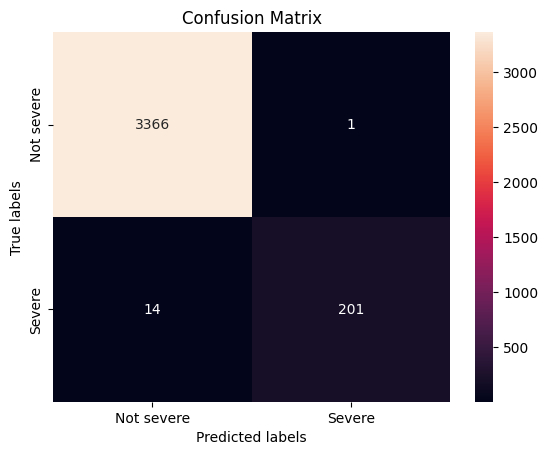

In [19]:
# draw the confusion matrix with FP, FN, TP, TN
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not severe', 'Severe']); ax.yaxis.set_ticklabels(['Not severe', 'Severe']);
plt.show()
